# Assignment 1
MIE1642 Intro. to Data Science <br> 
By: Rahul Rohatgi <br>
Date: Nov 13,2017 <br>

## 1.0 Importing Libraries

The following are the libraries used to accomplish the analysis.

In [1]:
import numpy as np
import pandas as pd
import re
import html
import matplotlib.pyplot as plt

%matplotlib inline

#from __future__ import division, print_function, absolute_import

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Please ignore the error as it relates to one of the package functions being changed in future version. 

## 2.0 Classified Text

First the classified text is imported into a panda series. Then the class and text column are extracted into different variables. Only these two columns are extracted because they are the only ones required for the analysis. <br>
<br>
Note that for the file to be read it must be present within the workbench with the exact same name.

In [2]:
dataset = pd.read_csv('classified_tweets.txt')

In [3]:
dataset_y = dataset['class']
dataset_x = dataset['text']

### 2.1 Cleaning Classified Dataset

The tweets are cleaned up before they are used for model in order to get raid of unwanted characteristics such as URL links. The cleaning started by first making all the tweets in lower case.

In [4]:
dataset_x = dataset_x.str.lower()

Next the URLs were removed. This included picture URLs.

In [5]:
dataset_x = dataset_x.str.replace('http\S+|www.\S+|pic.t\S+','',case=False)

After the Html tags and attributes were removed. 

In [6]:
tag_re = re.compile(r'<[^>]+>')

def remove_tags(dataset_x):
    return tag_re.sub('',dataset_x)

Last of all to clean the data all Html character codes were replaced with their ASCII equivalent. (E.g. &amp; = &)

In [7]:
html_cc = len(dataset_x)
for i in range(0,html_cc):
    dataset_x68 = html.unescape(dataset_x.iloc[i])
    dataset_x.iloc[i] = dataset_x68


The data is cleaned in only 5 ways. Above are the four filters and a fifth is accomplished below. These pieces of data were modified/removed because there is no reason to vectorize them as they do not have any sentiment. However, in the case of URLs these can be checked for sentiment but that would require a completely different process and therefore they were removed. As well, going through these five filters of cleaning helps the speed of the execution for the later steps.  

### 2.2 Model

**_Model Preparation_** <br> <br>
In order to create a logistics regression machine learning algorithm for twitter sentiment analysis the model was first prepared. This means vectorizing each word with a number so the machine learning algorithm can accomplish its task. Note that more data cleaning is done in this phase with the scikit learn package. All the stop words are removed from the tweets and the list of these stop words can be found here: http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words. By removing the stop words less features are created and thus making the model more efficient. Likewise, scikit learn package is used because it is one of the simpler and better packages to use for this type of analysis. 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(dataset_x,dataset_y, test_size = 0.3)

y_train = y_train.astype('int')

bag_of_words = CountVectorizer(stop_words = 'english')

x_train_bog = bag_of_words.fit_transform(x_train)

x_test_bog = bag_of_words.transform(x_test)

The following next few lines of code are used to ensure the size of the features are the same otherwise a model can not be created. 

In [9]:
y_train.shape

(140000,)

In [10]:
x_train_bog.shape

(140000, 109357)

In [11]:
x_test_bog.shape

(60000, 109357)

In [12]:
x_test.shape

(60000,)

**_Model Implementation_** <br><br>
The logistic regression model is created using the train elements and then it is used to predict the sentiment analysis of the test elements. 

In [13]:
model = LogisticRegression(random_state=0)

model.fit(x_train_bog,y_train)

predicted = model.predict(x_test_bog)
print(predicted)

actual = np.array(y_test)

[0 0 4 ..., 0 4 4]


**_Model Accuracy_** <br> <br>
The accuracy of the model created above is found using the following lines of code. This is important because a low accuracy means the model is not acceptable. Note that each iteration will produce a slightly different score. 

In [14]:
correct_counter = 0

for i in range(0, len(predicted)):
    if predicted[i] == actual[i]:
        correct_counter = correct_counter + 1

accuracy = correct_counter/len(predicted)
accuracy

0.7620166666666667

### 2.3 Exploratory Analysis

**_Graphical Representation_**<br><br>
The below figure (Figure 1) is a pie graph showing the ratio of positive and negative tweets in the classified data set. This helps provide visual insight on how fair the train and test data set are. Ideally the model should not be trained with just positive tweets as then it would not know what a negative tweet would be. This was not the case here, in fact it is even which is great for training the model.

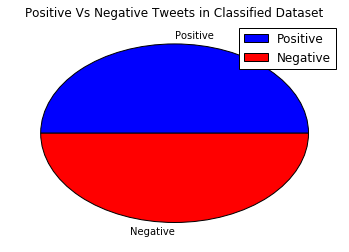

In [15]:
dataset['class'] = dataset['class'].astype(str)

ham = dataset[dataset['class'].str.contains('4')] #random variable names used just for graphing purposes
ham_len = len(ham)
eggs = dataset[dataset['class'].str.contains('0')]
eggs_len = len(eggs)

i = [ham_len,eggs_len]
ru = ['Positive','Negative']
cols = ['blue','red']

plt.pie(i,labels=ru,colors=cols)
plt.title('Positive Vs Negative Tweets in Classified Dataset')
plt.legend()

Figure 1: Ratio of positive and negative tweets in classified dataset

## 3.0 Classified Text

**_Importing and Defining Dataset Variables_** <br><br>
The unclassified text is imported into a panda series. Then it is converted into a string, so it can be cleaned and analyzed.

In [16]:
dataset_unclass = pd.read_csv('unclassified_tweets.txt',sep = '\t', names = ['tweet'])
dataset_unclass['tweet'] = dataset_unclass['tweet'].astype(str)
dataset_u = dataset_unclass['tweet']

### 3.1 Cleaning Unclassified Dataset

The exact same cleaning method was used as the classified dataset.

_Lowercase cleaning_

In [17]:
dataset_u = dataset_u.str.lower()

_Removing URLS_

In [18]:
dataset_u = dataset_u.str.replace('http\S+|www.\S+|pic.t\S+','',case=False)

_Removing HTML tags and attributes_

In [19]:
tag_re = re.compile(r'<[^>]+>')

def remove_tags(dataset_u):
    return tag_re.sub('',dataset_u)

_Replacing Html character codes with ASCII_

In [20]:
html_cc = len(dataset_u)

for i in range(0,html_cc):
    dataset_u68 = html.unescape(dataset_u.iloc[i])
    dataset_u.iloc[i] = dataset_u68


### 3.2 Exploratory Analysis

**_Determination Procedure_** <br><br>
To find the tweets associated for each party, key words were searched. The words used were mainly twitter username or common hashtags because these are most likely to be common among the tweets. Then tweets were stored in one panda series and duplicates were deleted. This procedure is done for the five main parties of the 2015 Canadian Election.  

_Liberal Party_

In [21]:
x = dataset_u[dataset_u.str.contains('liberal')]
len(x)

y = dataset_u[dataset_u.str.contains('trudeau')]
len(y)

z = dataset_u[dataset_u.str.contains('justin')]
len(z)

x2 = dataset_u[dataset_u.str.contains('justintrudeau')]
len(x2)

liberal = pd.concat([x,y,z,x2]).drop_duplicates()
L=len(liberal)

The lines of code below store the index of the tweets in an array. The array created is used to find the sentiment analysis result and use that information for graphical presentation. 

In [22]:
party_L = []
for i in range (0,len(dataset_u)):
    try:
        liberal.loc[i]
        party_L.append(i)
    except Exception:
        pass

_Conservative Party_

In [23]:
x = dataset_u[dataset_u.str.contains('conservative')]
len(x)

y = dataset_u[dataset_u.str.contains('harper')]
len(y)

z = dataset_u[dataset_u.str.contains('@pmharper')]
len(z)

x2 = dataset_u[dataset_u.str.contains('stephenharper')]
len(x2)

conserative = pd.concat([x,y,z,x2]).drop_duplicates()
C=len(conserative)

In [24]:
party_C = []
for i in range (0,len(dataset_u)):
    try:
        conserative.loc[i]
        party_C.append(i)
    except Exception:
        pass

_NDP Party_

In [25]:
x = dataset_u[dataset_u.str.contains('#ndp')]
len(x)

y = dataset_u[dataset_u.str.contains('thomasmulcair')]
len(y)

z = dataset_u[dataset_u.str.contains('#mulcair')]
len(z)

x2 = dataset_u[dataset_u.str.contains('@ndp_hq')]
len(x2)

ndp = pd.concat([x,y,z,x2]).drop_duplicates()
N = len(ndp)

In [26]:
party_N = []
for i in range (0,len(dataset_u)):
    try:
        ndp.loc[i]
        party_N.append(i)
    except Exception:
        pass

_Green Party_

In [27]:
x = dataset_u[dataset_u.str.contains('greenparty')]
len(x)

y = dataset_u[dataset_u.str.contains('elizabethmay')]
len(y)

green_party = pd.concat([x,y]).drop_duplicates()
G = len(green_party)

In [28]:
party_G = []
for i in range (0,len(dataset_u)):
    try:
        green_party.loc[i]
        party_G.append(i)
    except Exception:
        pass

_Bloc Quebecois Party_

In [29]:
x = dataset_u[dataset_u.str.contains('bloc quebecois')]
len(x)

y = dataset_u[dataset_u.str.contains('duceppe')]
len(y)

z = dataset_u[dataset_u.str.contains('gillesduceppe')]
len(z)

bloc_quebec = pd.concat([x,y,z]).drop_duplicates()
BQ = len(bloc_quebec)

In [30]:
party_BQ = []
for i in range (0,len(dataset_u)):
    try:
        bloc_quebec.loc[i]
        party_BQ.append(i)
    except Exception:
        pass

**_Graphical Analysis_**

The figure represents the total number of tweets each party is mentioned in. This shows some key insight into the Canadian political landscape in 2015.

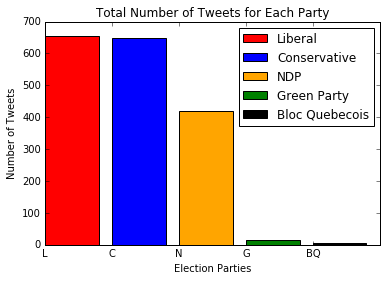

In [31]:
x = [1,2,3,4,5]
x2 = ['L','C','N','G','BQ']

plt.bar(x[0],L,label='Liberal',color='red')
plt.bar(x[1],C,label='Conservative',color='blue')
plt.bar(x[2],N,label='NDP',color='orange')
plt.bar(x[3],G,label='Green Party',color='green')
plt.bar(x[4],BQ,label='Bloc Quebecois',color='black')
plt.xticks(x,x2)
plt.xlabel('Election Parties')
plt.ylabel('Number of Tweets')
plt.title('Total Number of Tweets for Each Party')
plt.legend()

Figure 2: Total number of tweets for each party.

### 3.3 Model

**_Model Preparation_**<br><br>
The data is vectorized in the same method the classified tweets were. Once again, the stop words are filtered out during this process as well. The shape of the vector is also verified once again before the model is used for prediction

In [32]:
y=bag_of_words.transform(dataset_u)

y.shape

(3026, 109357)

**_Model Implementation_**<br><br>
The model is now used to conduct the sentiment analysis.

In [33]:
predict_unclass=model.predict(y)
print(predict_unclass)

[4 4 4 ..., 4 4 4]


### 3.4 Post Modeling Exploratory Analysis

The following pie graph shows the ratio of positive tweets to negative tweets within the classified text file. Note pie graphs are used mainly because each iteration will produce slightly different results thus analyzing the ratio is better than exact numbers. 

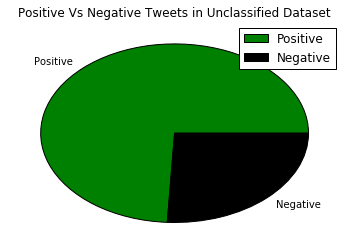

In [34]:
x = np.count_nonzero(predict_unclass == 4)

y = np.count_nonzero(predict_unclass == 0)

i = [x,y]
ru = ['Positive','Negative']
cols = ['green','black']

plt.pie(i,labels=ru,colors=cols)
plt.title('Positive Vs Negative Tweets in Unclassified Dataset')
plt.legend()

Figure 3: Landscape of positive tweets vs negative tweets in unclassified dataset

Figures 4 - 6 are pie graphs that represent the ratio of positive to negative tweets for Liberal, Conservative and NDP. The other two parties are omitted because of their relatively smaller number of total tweets.

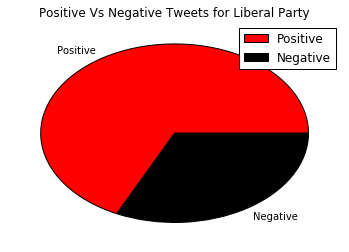

In [35]:
l_L = predict_unclass[party_L]

x_L = np.count_nonzero(l_L == 4)

y_L = np.count_nonzero(l_L == 0)

i = [x_L,y_L]
ru = ['Positive','Negative']
cols = ['red','black']

plt.pie(i,labels=ru,colors=cols)
plt.title('Positive Vs Negative Tweets for Liberal Party')
plt.legend()

Figure 4: Ratio of positive to negative tweets for Liberal Party

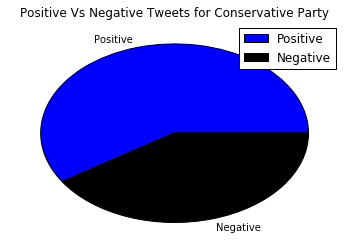

In [36]:
l_C = predict_unclass[party_C]

x_C = np.count_nonzero(l_C == 4)

y_C = np.count_nonzero(l_C == 0)

i = [x_C,y_C]
ru = ['Positive','Negative']
cols = ['blue','black']

plt.pie(i,labels=ru,colors=cols)
plt.title('Positive Vs Negative Tweets for Conservative Party')
plt.legend()

Figure 5: Ratio of positive to negative tweets for Conservative Party

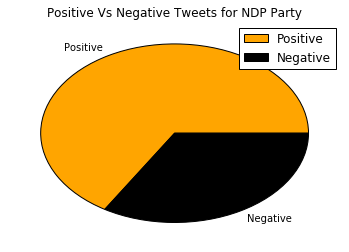

In [37]:
l_N = predict_unclass[party_N]

x_N = np.count_nonzero(l_N == 4)

y_N = np.count_nonzero(l_N == 0)

i = [x_N,y_N]
ru = ['Positive','Negative']
cols = ['orange','black']

plt.pie(i,labels=ru,colors=cols)
plt.title('Positive Vs Negative Tweets for NDP Party')
plt.legend()

Figure 6: Ratio of positive to negative tweets for NDP Party

Evidently, the figure below shows the total number of positive tweets for each of the three parties.

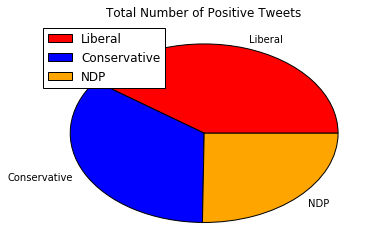

In [38]:
i = [x_L,x_C,x_N]
ru = ['Liberal','Conservative','NDP']
cols = ['red','blue','orange']

plt.pie(i,labels=ru,colors=cols)
plt.title('Total Number of Positive Tweets')
plt.legend(loc=2)

Figure 7: Total number of positive tweets for Liberal, Conservative and NDP

### 3.5 Discussion

**Question:** What can public opinion on Twitter tell us about the Canadian political landscape in 2015?<br><br>

**Answer:**<br>
From the sentiment analysis conducted on the tweets during the Canadian elections a lot could be concluded about the political landscape in 2015. Initially, a lot was evident from just counting the total number of tweets for each party. Figure 2 displays that there were only three major parties dominating the landscape and they were the Liberal, Conservative and NDP parties. The Green party and Bloc Quebecois were not even on the landscape. However, the total number of tweets does not determine if the public opinion is negative or positive, but Figure 3 does provide the insight that majority of the tweets should be of positive public opinion. Figures 4-6 agree with this finding and help determine the details of the landscape. These figures show that Liberal and NDP parties had a larger ratio of positive tweets respective to their negative tweets when compared to the Conservative’s ratio. Therefore, even though the Conservative party had the second most total tweets, they were not receiving the same amount of positive support as the other two. Clearly, from the figures the Liberals were the clear leader in terms of ratio and NDP was close behind them. The last figure (Figure 7) concludes that between the three major parties Liberal’s had the most positive opinion among the population. Followed by the Conservatives despite having received the most negativity. Thus, in conclusion the political landscape in 2015 was made up of three parties and the Liberals were in charge followed by the Conservatives and NDP. However, the Conservative party was at higher risk of losing the number of positive support whereas NDP and Liberal were at a far lower risk. 